UBER EXPLORATORY ANALYSIS
 
Analysing the dataset to get detailed information pertaininng the number of trips per (hour, month), categories, purpose of     each trip and speed of each trip to maximise business in a particular area.

In [86]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')

import datetime
import seaborn

%matplotlib inline

In [3]:
# we load the csv file.
data = pd.read_csv("C:/Users/Dhrumil/Desktop/uberexplo.csv")

In [76]:
data.head(7)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month,Duration_Minutes,Duration_hours,Speed_KM
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,6.0,0.100000,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,12.0,0.200000,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,13.0,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,14.0,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,67.0,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,1,4.0,0.066667,64.500000
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,1,5.0,0.083333,85.200000


In [64]:
data.tail(11)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month,Duration_Minutes,Duration_hours,Speed_KM
1141,2016-12-29 19:50:00,2016-12-29 20:10:00,Business,Unknown Location,Kar?chi,4.1,Customer Visit,12,20.0,0.333333,12.300000
1142,2016-12-29 20:15:00,2016-12-29 20:45:00,Business,Kar?chi,Kar?chi,7.2,Meeting,12,30.0,0.500000,14.400000
1143,2016-12-29 20:53:00,2016-12-29 21:42:00,Business,Kar?chi,Unknown Location,6.4,NaN,12,49.0,0.816667,7.836735
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting,12,33.0,0.550000,23.454545
1145,2016-12-30 10:15:00,2016-12-30 10:33:00,Business,Kar?chi,Kar?chi,2.8,Errand/Supplies,12,18.0,0.300000,9.333333
1146,2016-12-30 11:31:00,2016-12-30 11:56:00,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies,12,25.0,0.416667,6.960000
1147,2016-12-30 15:41:00,2016-12-30 16:03:00,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies,12,22.0,0.366667,12.545455
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,12,23.0,0.383333,12.000000
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,12,4.0,0.066667,12.000000
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,12,7.0,0.116667,6.000000


In [53]:
# Remove unnecessary data if present 
data = data[:-1]


In [52]:
# fix data types of data columns

def convert_time(column_name):
    y=[]
    for x in data[column_name]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    data[column_name] = y


In [11]:
column_date = data[['START_DATE*','END_DATE*']] 
for x in column_date:
    convert_time(x)

In [73]:
# check that all data is fixed and ready to work on it
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   START_DATE*       1152 non-null   datetime64[ns]
 1   END_DATE*         1152 non-null   datetime64[ns]
 2   CATEGORY*         1152 non-null   object        
 3   START*            1152 non-null   object        
 4   STOP*             1152 non-null   object        
 5   MILES*            1152 non-null   float64       
 6   PURPOSE*          650 non-null    object        
 7   Month             1152 non-null   int64         
 8   Duration_Minutes  1152 non-null   float64       
 9   Duration_hours    1152 non-null   float64       
 10  Speed_KM          1152 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(4)
memory usage: 99.1+ KB


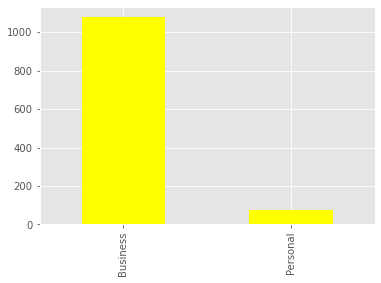

In [35]:
# plot number of trip at each category
x = data['CATEGORY*'].value_counts().plot(kind='bar',color = "yellow")

In [16]:
# As we notice that the most trips made in business category we
#extract month from start date
count = 0
month=[]
while count < len(data):
    month.append(data['START_DATE*'][count].month)
    count = count+1
data['Month'] = month

In [17]:
# to calculate duration of each trip in minutes
minutes=[]
data['Duration_Minutes'] = data['END_DATE*'] - data['START_DATE*']
data['Duration_Minutes']
for x in data['Duration_Minutes']:
    minutes.append(x.seconds / 60)

data['Duration_Minutes'] = minutes

Text(0.5, 1.0, 'Number of trips per Month')

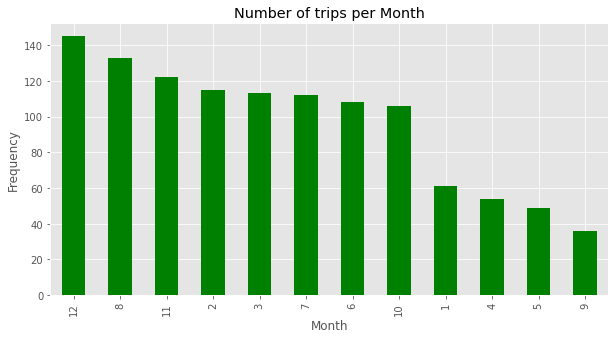

In [39]:
# to plot number of trips at each month
x = data['Month'].value_counts()
x.plot(kind='bar',figsize=(10,5),color='green')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of trips per Month')

Text(0.5, 1.0, 'Number of trips per hour !')

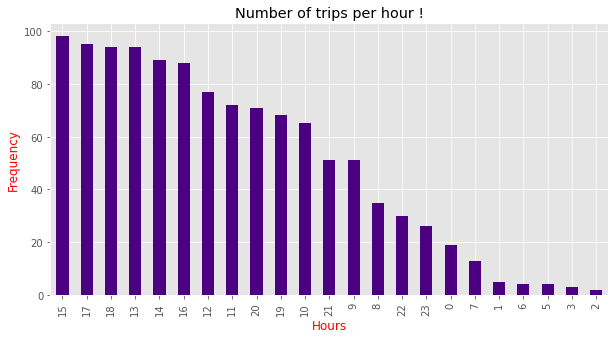

In [42]:
# in case if there is a need to see how many trips are made at each clock. 
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='indigo',figsize=(10,5))
plt.xlabel('Hours',color='red')
plt.ylabel('Frequency',color='red')
plt.title('Number of trips per hour !')

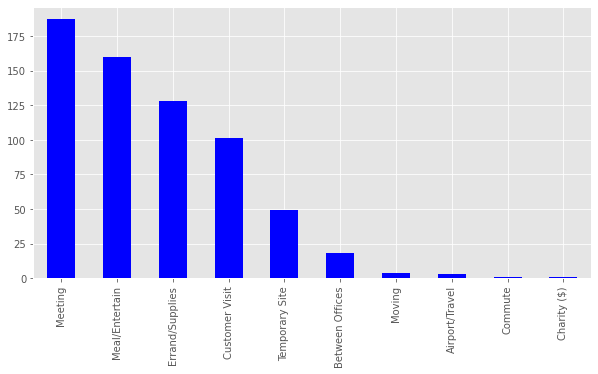

In [40]:
# see how many trips made by each purpose
purpose_time = data['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='blue')

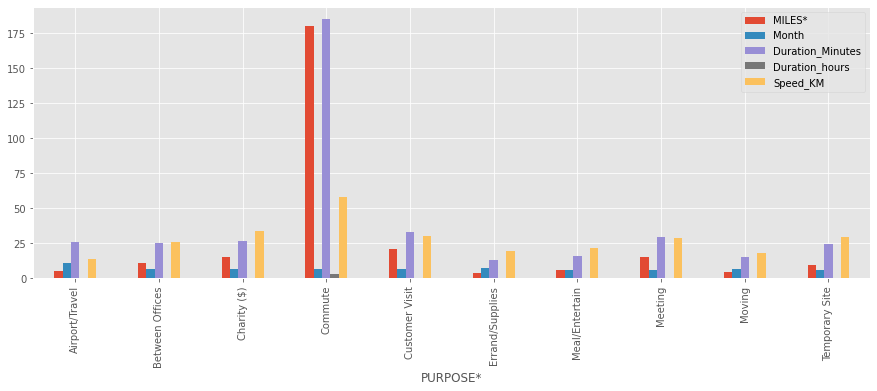

In [37]:
# we need to calculate trip in hours at the first and save it into [duraion_hours] 
# we need to know the speed of each drive to accomplish each trip by applying speed law speed = distance / time
# aveverage of each trip according to purpose
purpose = data.groupby('PURPOSE*').mean()
purpose.plot(kind = 'bar',figsize=(15,5))

In [34]:
# calculate trip speed for each driver
data['Duration_hours'] = data['Duration_Minutes'] / 60
data['Speed_KM'] = data['MILES*'] / data['Duration_hours']
data['Speed_KM']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
          ...    
1149    12.000000
1150     6.000000
1151    13.000000
1152    27.771429
1153    21.333333
Name: Speed_KM, Length: 1154, dtype: float64